In [1]:
from pychomp import *
# import DSGRN
%run DrawPosetGraph.py
%run Poset_E.py
%run SetCM.py
%run DiscreteVectorFieldCubicalComplex.py
%run Plot2D_DVF.py

### Connection Matrix for cubical complex 

<img src="./pictures/example0_0.pdf" alt="Drawing" style="width: 300px;"/>

repeller at infinity (arrows inward to the boundary)

Convetions:

no edges means double edges 

In [84]:
cc = CubicalComplex([2 + 1, 2 + 1])  # Create cubical complex 3x3 with extra layer of cells (fringe cells)

# create a discrete vector field (dvf), by default arrows at the boundary points inward
dvf = DiscreteVectorFieldCubicalComplex(cc)

In [85]:
# Use the following dictionary to create a discrete vector field, where a : {b} means a -> b

A = {2: {0},
     3: {1}
    }

dvf.add_pairs(A)  # load A to to create the discrete vector field
dvf.auto_double_edges()  # use this function to put double edges elsewhere 

# Use the following funtion to remove arrows, input is also a dictionary
dvf.remove_pairs({2 : {0}})

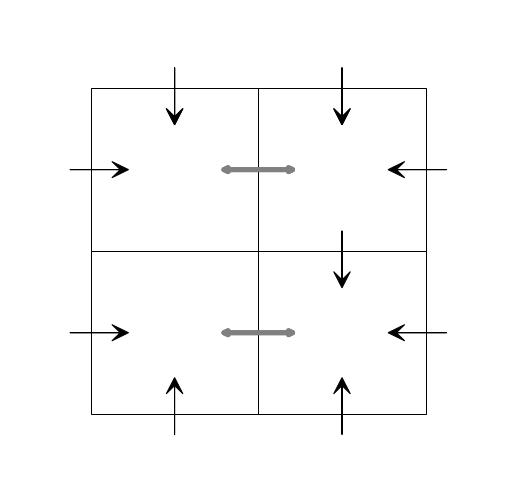

In [86]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

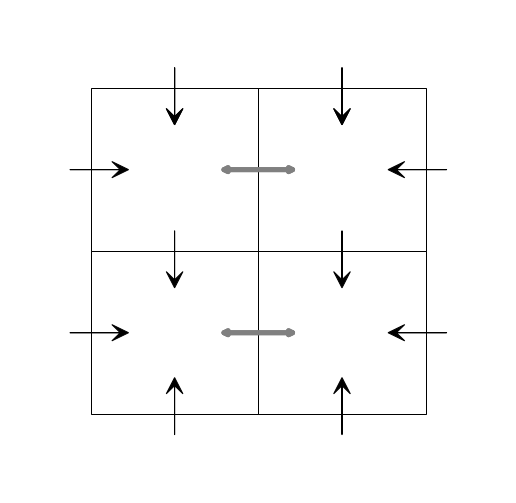

In [88]:
# add again an arrow from 2 to 0
dvf.add_pairs({2 : {0}})

# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
0(0) : {}
Boundaries of 1-cells in Connection Fibration:
Boundaries of 2-cells in Connection Fibration:


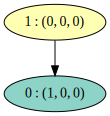

In [89]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

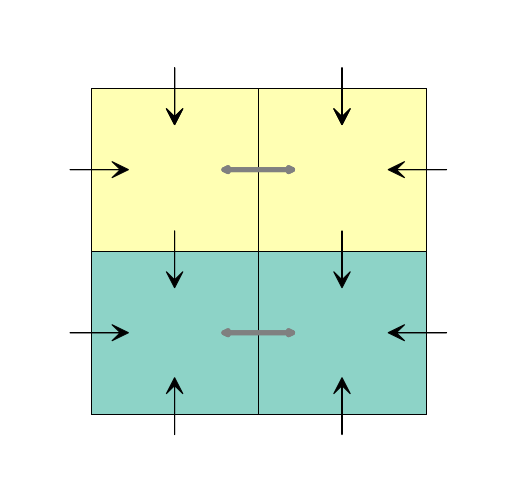

In [66]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [67]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [8]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(0, 0): set()}

In [9]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{0: set()}

In [10]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[]


In [11]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

1

### Connection Matrix for cubical complex
<img src="./pictures/example0.pdf" alt="Drawing" style="width: 300px;"/>

attractor at infinity (arrows outward to the boundary)

Convetions:

no edges means double edges 

In [12]:
cc = CubicalComplex([3,3])

# create a discrete vector field (dvf), use False when arrows at the boundary point outward
dvf = DiscreteVectorFieldCubicalComplex(cc, False)

In [13]:
A = {2: {0},
     3: {1}
    }

dvf.add_pairs(A)
dvf.auto_double_edges()

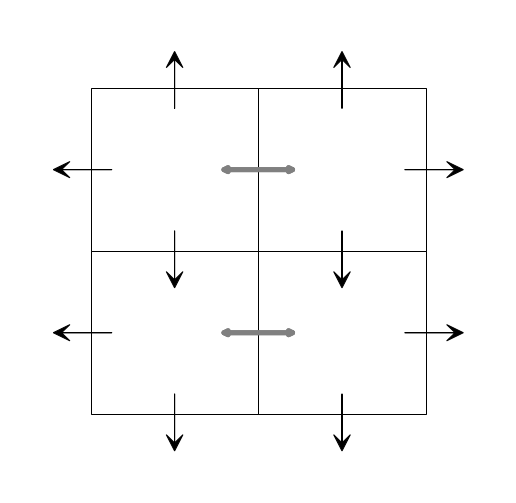

In [14]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
Boundaries of 1-cells in Connection Fibration:
Boundaries of 2-cells in Connection Fibration:
2(2) : {(0, 1)}


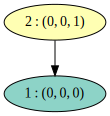

In [15]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

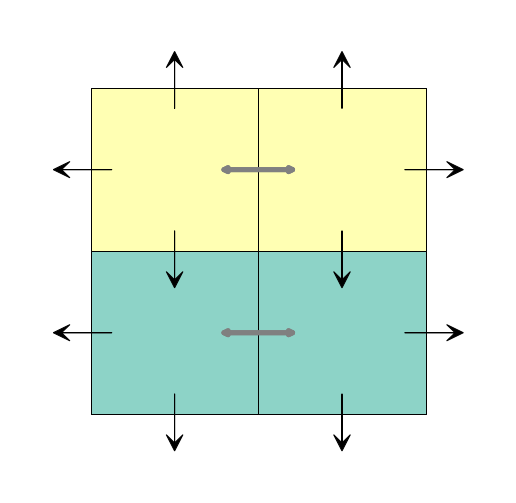

In [16]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [17]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [18]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(2, 0): {None}}

In [19]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{2: {1}}

In [20]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[]


In [21]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

1

### Connection Matrix for cubical complex

<img src="./pictures/example1.png" alt="Drawing" style="width: 300px;"/>

Convetions:

repeller at infinity (arrows inward to the boundary)

no arrows means double arrows 

In [22]:
cc = CubicalComplex([4,4])  # Create cubical complex 3x3 with extra layer of cell (fringe cell)

dvf = DiscreteVectorFieldCubicalComplex(cc)  # create a discrete vector field (dvf)

In [23]:
A = {48: {48},
     49: {48, 49, 50},
     50: {50},
     52: {53, 56},
     53: {49, 52, 53, 54, 57},
     54: {53, 58},
     56: {57},
     57: {56, 58},
     58: {57}
    }

dvf.add_pairs(A)

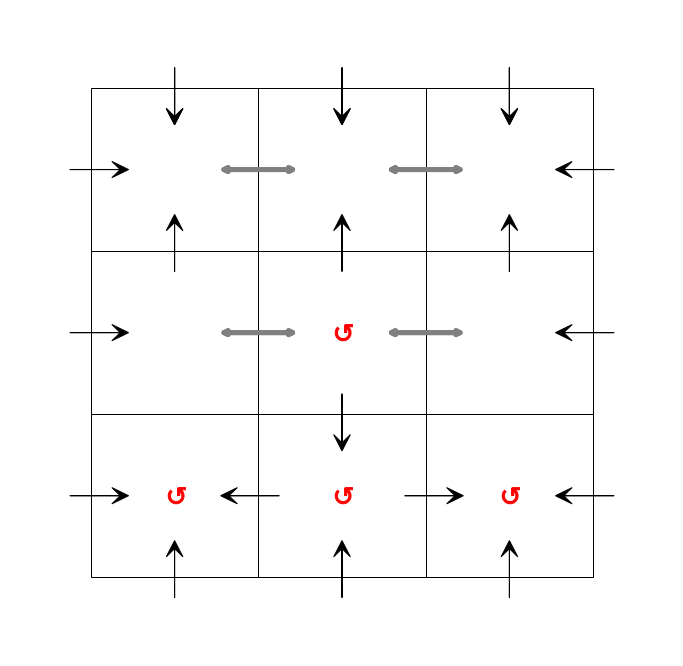

In [24]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
2(0) : {}
1(1) : {}
0(2) : {}
Boundaries of 1-cells in Connection Fibration:
3(3) : {(1, 1), (2, 0)}
4(4) : {(1, 1), (0, 2)}
Boundaries of 2-cells in Connection Fibration:


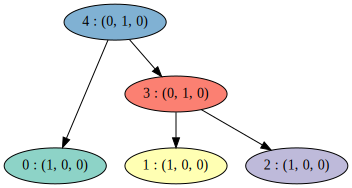

In [25]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

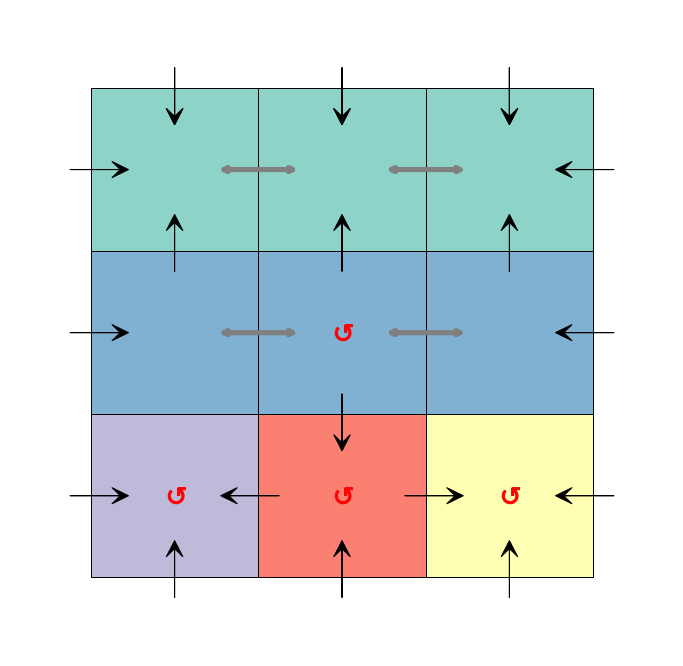

In [26]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [27]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [28]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(2, 0): set(),
 (1, 0): set(),
 (0, 0): set(),
 (3, 0): {(1, 0), (2, 0)},
 (4, 0): {(0, 0), (1, 0)}}

In [29]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{0: set(), 1: set(), 2: set(), 3: {0, 1}, 4: {1, 2}}

In [30]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[[1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [31]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

2

### Connection Matrix for cubical complex
<img src="./pictures/example2.pdf" alt="Drawing" style="width: 500px;"/>

Convetions:

attractor at infinity (arrows inward to the boundary)

no arrows means double arrows 

In [32]:
cc = CubicalComplex([6,6])

# create a discrete vector field (dvf), use False when arrows at the boundary point outward
dvf = DiscreteVectorFieldCubicalComplex(cc, False)

In [33]:
A = {1: {6},
     2: {1, 2, 3, 7},
     3: {8},
     5: {6, 10},
     9: {8},
     10: {10, 11},
     12: {7, 11, 12, 13, 17},
     14: {13, 14},
     15: {10, 16},
     19: {18},
     21: {16},
     22: {17, 21, 22, 23},
     23: {18}
    }

dvf.add_pairs(A)
dvf.auto_double_edges()

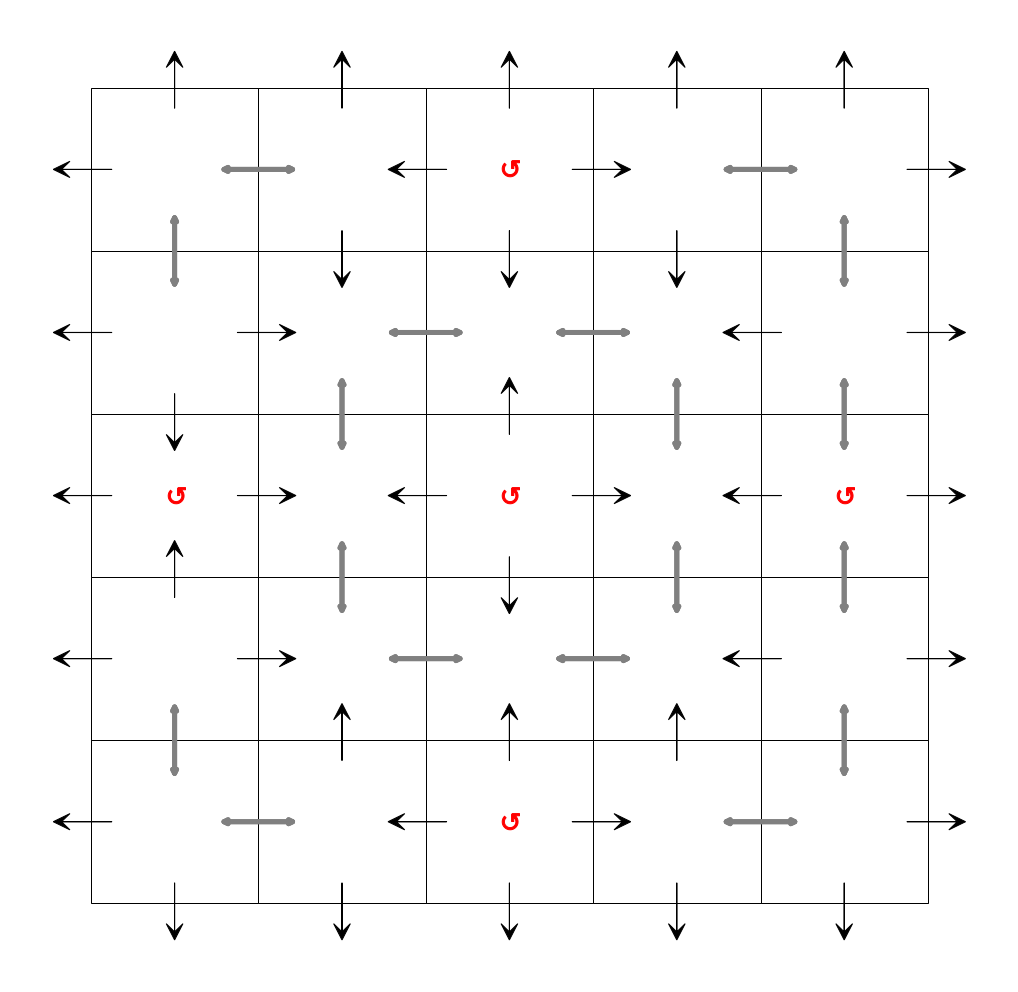

In [34]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
1(0) : {}
Boundaries of 1-cells in Connection Fibration:
3(2) : {(1, 0), (0, 1)}
2(3) : {(1, 0), (0, 1)}
1(5) : {}
Boundaries of 2-cells in Connection Fibration:
8(6) : {(2, 3), (3, 2), (0, 4), (1, 5)}
6(7) : {(1, 5)}
5(8) : {(2, 3), (3, 2)}


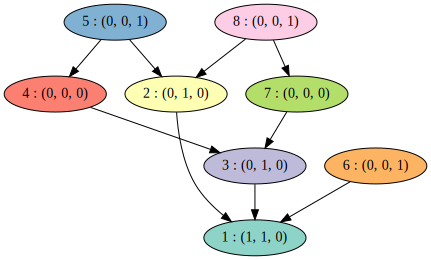

In [35]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

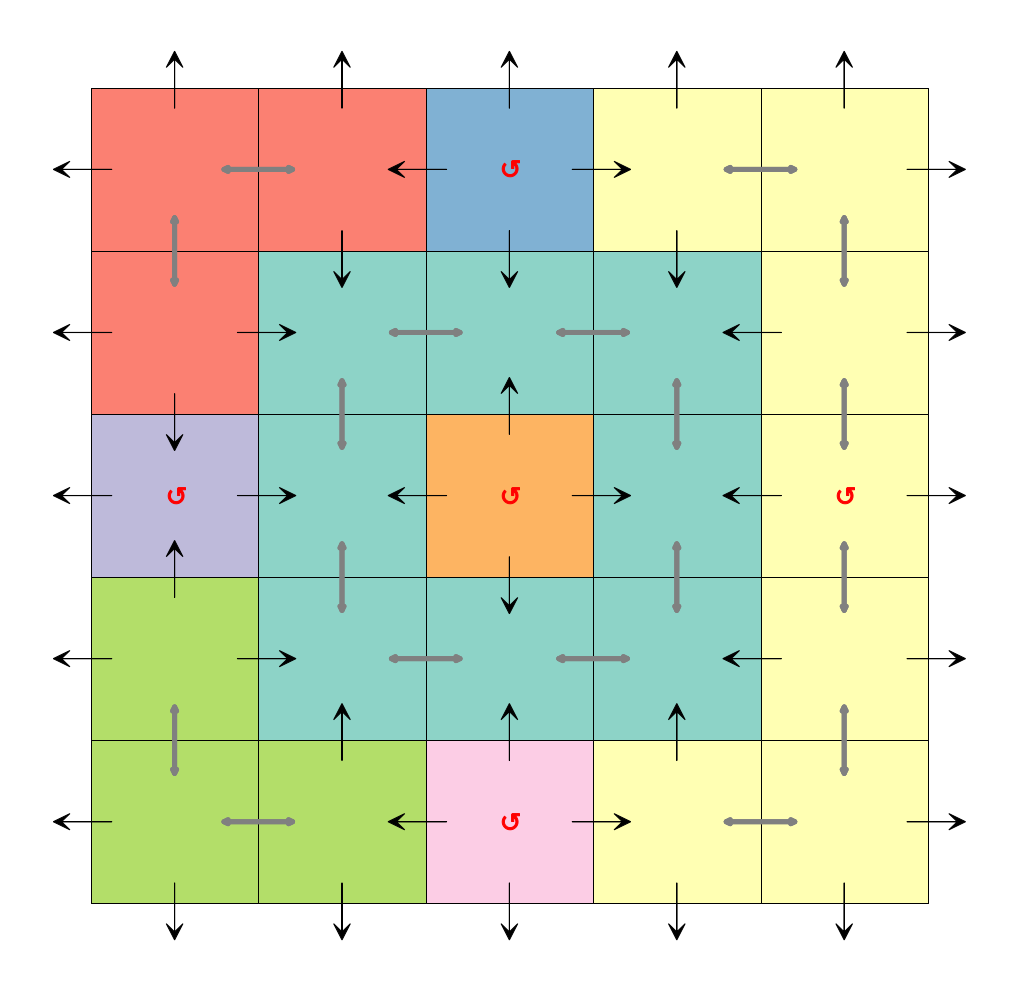

In [36]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [37]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [38]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(1, 0): set(),
 (3, 0): {(1, 0), None},
 (2, 0): {(1, 0), None},
 (1, 1): set(),
 (8, 0): {(1, 1), (2, 0), (3, 0), None},
 (6, 0): {(1, 1)},
 (5, 0): {(2, 0), (3, 0)}}

In [39]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{0: set(), 2: {0, 1}, 3: {0, 1}, 5: set(), 6: {2, 3, 4, 5}, 7: {5}, 8: {2, 3}}

In [40]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [41]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

4

### Connection Matrix for cubical complex
<img src="./pictures/example2_1.pdf" alt="Drawing" style="width: 500px;"/>

Convetions:

attractor at infinity (arrows inward to the boundary)

no arrows means double arrows 

In [42]:
cc = CubicalComplex([6,6])

# create a discrete vector field (dvf), use False when arrows at the boundary point outward
dvf = DiscreteVectorFieldCubicalComplex(cc, False)

In [43]:
A = {1: {6},
     2: {1, 2, 3, 7},
     3: {8},
     5: {6, 10},
     9: {8},
     10: {10, 11},
     12: {7, 11, 12, 13, 17},
     14: {13, 14},
     15: {10, 16},
     19: {18},
     21: {16, 21},
     20: {21},
     22: {17, 21, 22, 23},
     23: {18}
    }

dvf.add_pairs(A)
dvf.auto_double_edges()

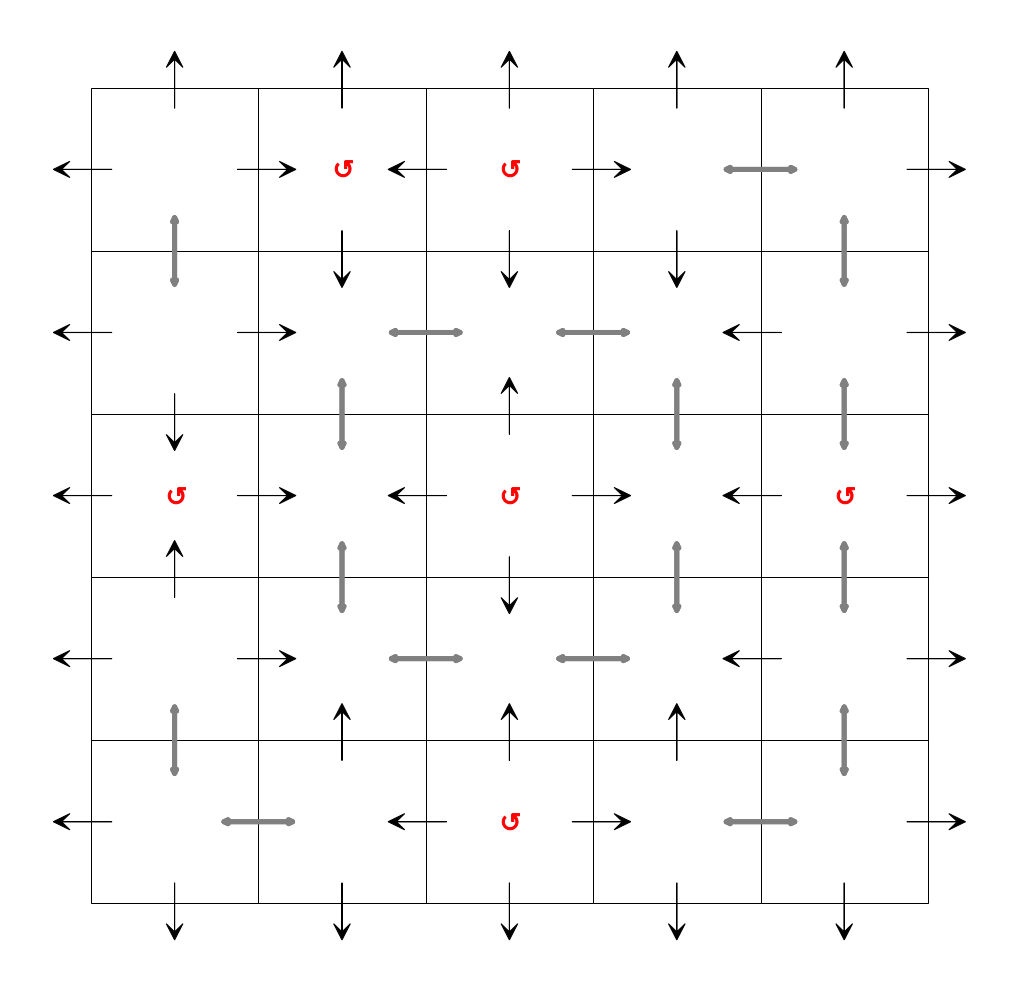

In [44]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
1(0) : {}
Boundaries of 1-cells in Connection Fibration:
5(2) : {(1, 0), (0, 1)}
2(3) : {(1, 0), (0, 1)}
1(5) : {}
3(6) : {(1, 0), (0, 1)}
Boundaries of 2-cells in Connection Fibration:
9(7) : {(2, 3), (1, 5), (0, 4), (5, 2)}
7(8) : {(1, 5)}
6(9) : {(3, 6), (5, 2)}
4(10) : {(2, 3), (3, 6)}


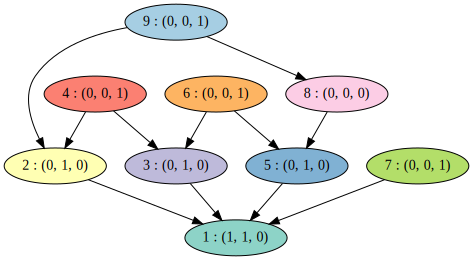

In [45]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

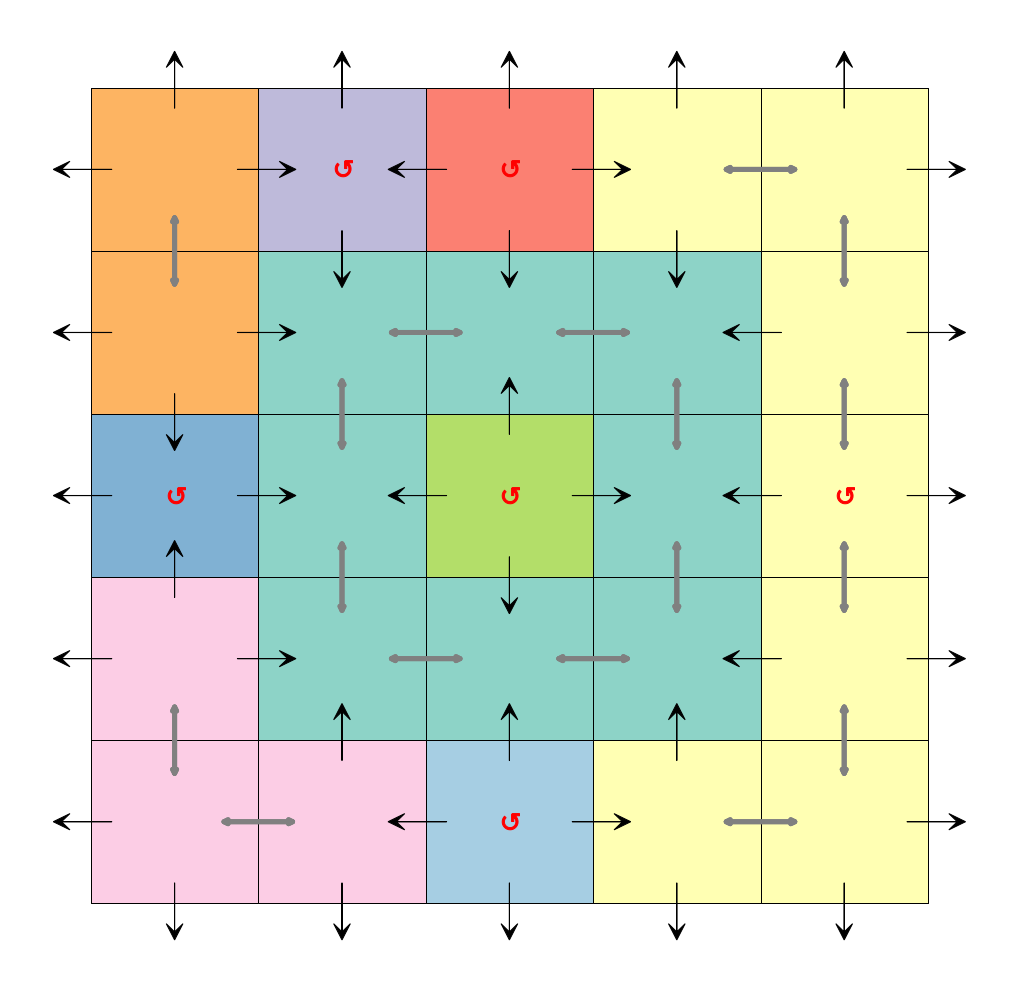

In [46]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [47]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [48]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(1, 0): set(),
 (5, 0): {(1, 0), None},
 (2, 0): {(1, 0), None},
 (1, 1): set(),
 (3, 0): {(1, 0), None},
 (9, 0): {(1, 1), (2, 0), (5, 0), None},
 (7, 0): {(1, 1)},
 (6, 0): {(3, 0), (5, 0)},
 (4, 0): {(2, 0), (3, 0)}}

In [49]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{0: set(),
 2: {0, 1},
 3: {0, 1},
 5: set(),
 6: {0, 1},
 7: {2, 3, 4, 5},
 8: {5},
 9: {2, 6},
 10: {3, 6}}

In [50]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[[1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0.

In [51]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

16

### Connection Matrix for cubical complex
<img src="./pictures/example4.pdf" alt="Drawing" style="width: 500px;"/>

Convetions:

repeller at infinity (arrows inward to the boundary)

no arrows means double arrows 

In [52]:
cc = CubicalComplex([8,8])

# create a discrete vector field (dvf), use False when arrows at the boundary point outward
dvf = DiscreteVectorFieldCubicalComplex(cc)

In [53]:
A = {8: {1, 7},
     9: {2, 16},
     10: {3, 9, 10, 11, 17},
     11: {4, 18},
     12: {5, 13},
     19: {18, 20, 26},
     26: {25, 26, 27},
     33: {26, 32, 34},
     40: {41, 47},
     36: {35, 37, 43},
     37: {30, 37, 44},
     38: {31, 37, 38, 39, 45},
     39: {32, 46},
     15: {14, 16, 22},
     22: {21, 22, 23},
     29: {22, 28, 30},
     24: {17, 23, 24, 25, 31},
    }

dvf.add_pairs(A)
dvf.auto_double_edges()

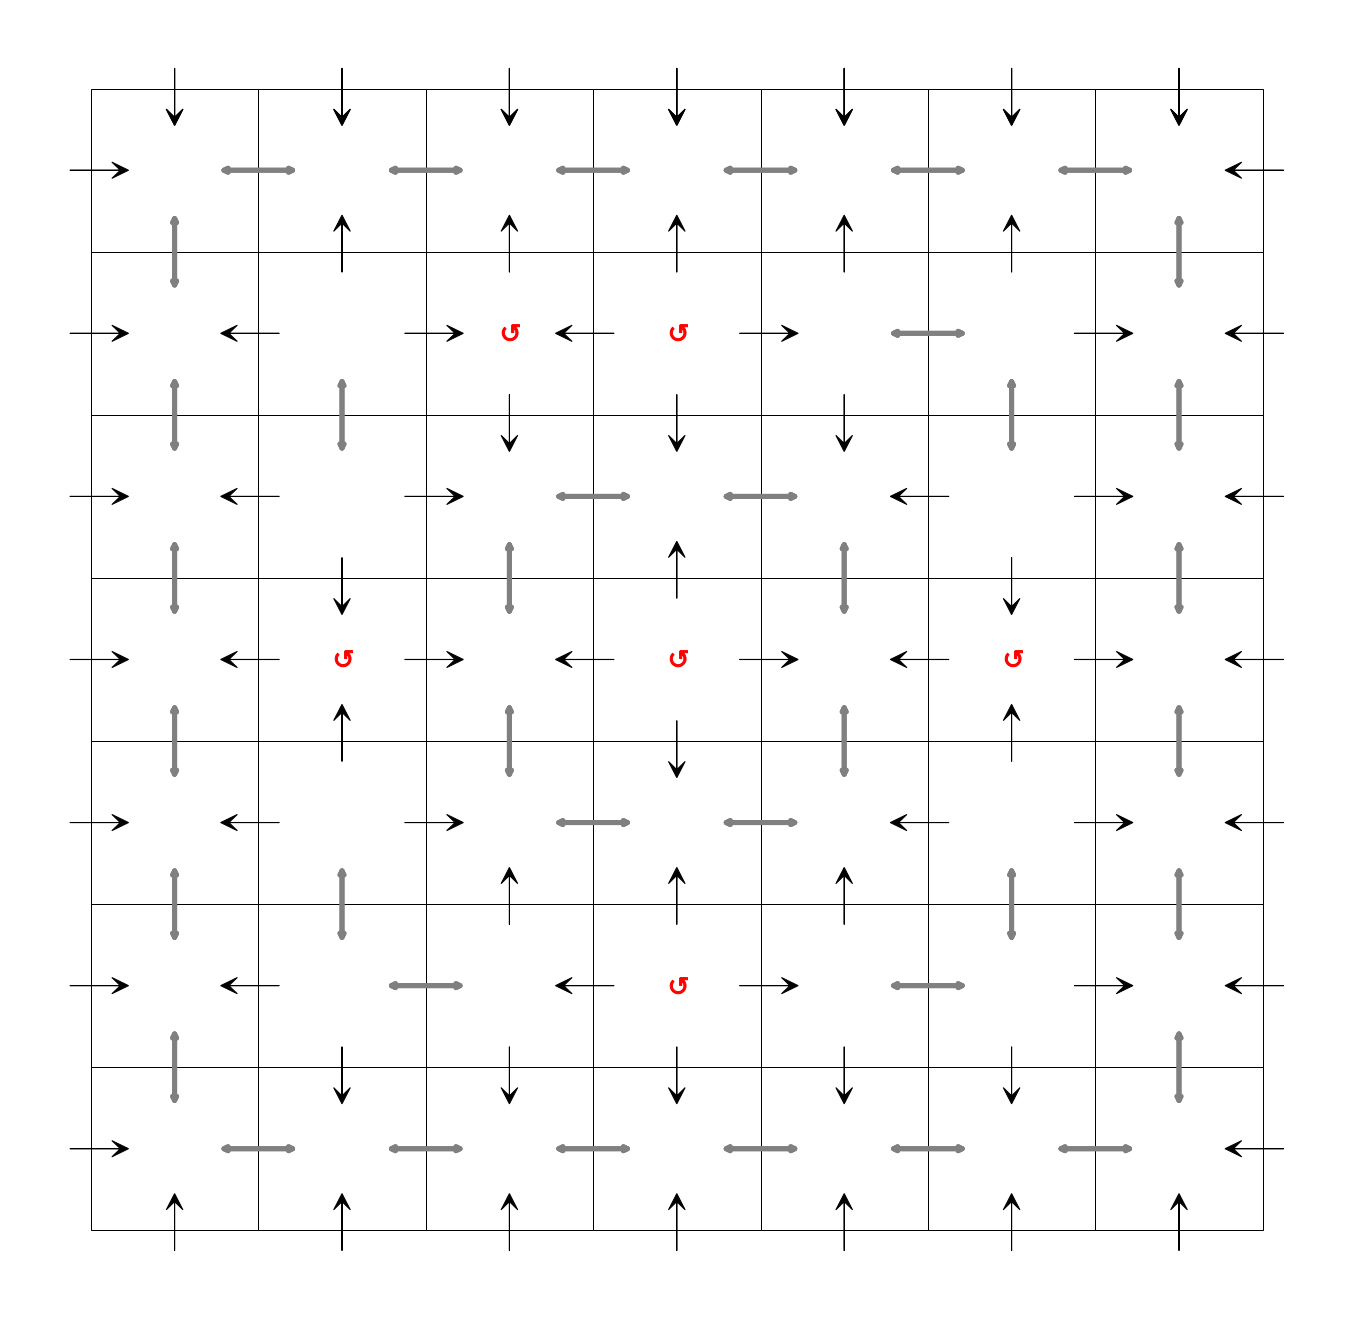

In [54]:
# plot the discrete vector field
b = Plot2D_DVF(dvf)

Connection Matrix Data
Boundaries of 0-cells in Connection Fibration:
2(0) : {}
0(1) : {}
Boundaries of 1-cells in Connection Fibration:
7(2) : {(0, 1), (2, 0)}
3(3) : {(0, 1), (2, 0)}
0(4) : {}
2(5) : {}
5(6) : {(0, 1), (2, 0)}
Boundaries of 2-cells in Connection Fibration:
12(7) : {(2, 5), (3, 3), (0, 4), (7, 2)}
9(8) : {(2, 5)}
8(9) : {(5, 6), (7, 2)}
6(10) : {(3, 3), (5, 6)}


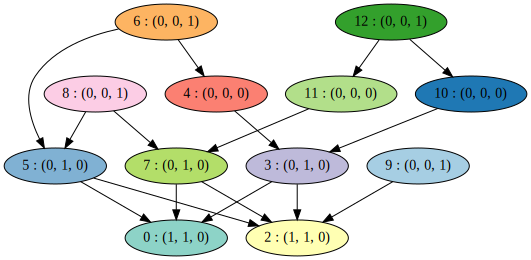

In [55]:
# Compute the Connection Matrix associated with the discrete vector field

(dag, fibration)= FlowGradedComplex(dvf.complex(), dvf.diagram())
connection_matrix = ConnectionMatrix(fibration)
conleyindices = connection_matrix.count()
fringenode = fibration.value(dvf.complex().size()-1)

# A Morse set is trivial if it is a single cell with no self edge
# Get all non-trivial Morse sets (including the ones with trivial CI)
def non_trivial_scc(v):
    scc_v = [c for c in dvf.digraph.vertices() if fibration.value(c) == v]
    return len(scc_v) > 1 or any(c in dvf.digraph.adjacencies(c) for c in scc_v)
CMG = InducedPoset_E(dag, lambda v : non_trivial_scc(v)  and v != fringenode)

print("Connection Matrix Data")
print("======================")
Delta = {}
C = connection_matrix.complex()
for d in range(C.dimension()+1):
    print("Boundaries of " + str(d)  + "-cells in Connection Fibration:")
    for c in C(d):
        cell = connection_matrix.value(c)
        if cell != fringenode:
            #bd_cell = [connection_matrix.value(b) for b in C.boundary({c})]
            bd_cell = [(connection_matrix.value(b),b) for b in C.boundary({c})]
            bd_cell = set(bd_cell) if bd_cell else {}
            Delta.update({(cell,c) : bd_cell})
            print(str(cell) + '(' + str(c) + ')' + ' : ' + str(bd_cell))

DrawPosetGraph(connection_matrix, CMG)  

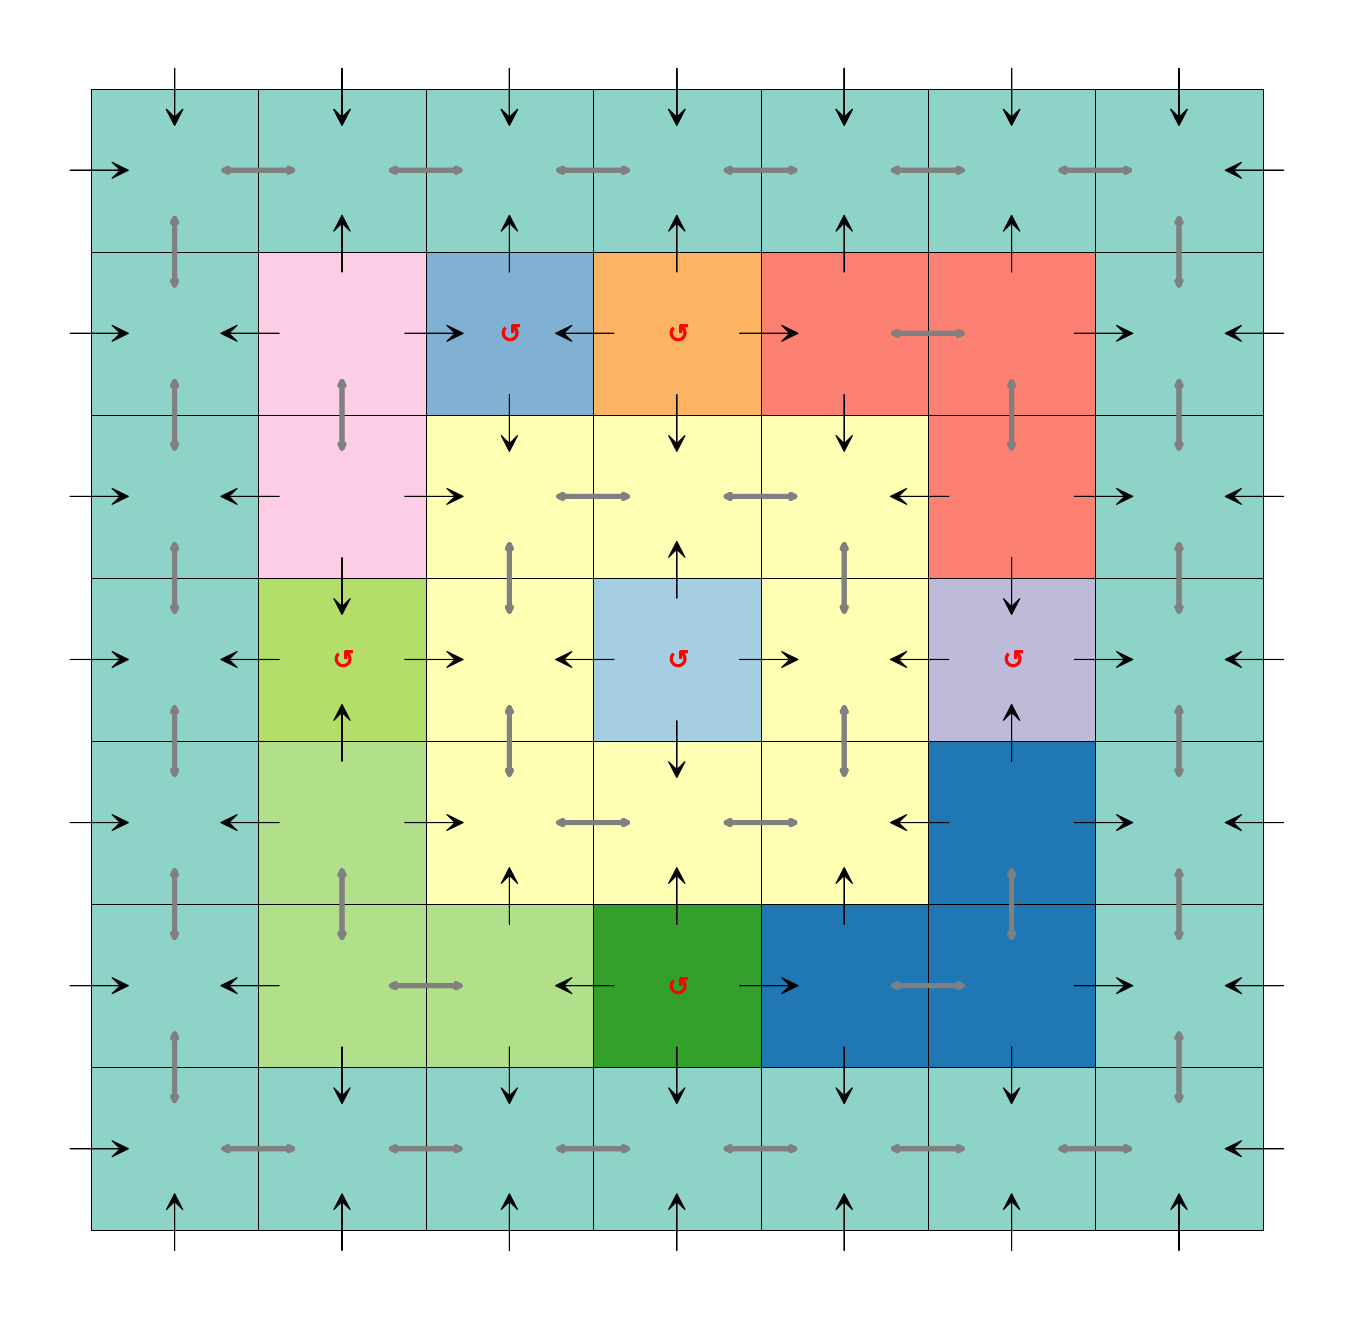

In [56]:
# plot discrete vector field and the Morse sets
b = Plot2D_DVF(dvf, CMG)

In [57]:
# Compute the set of connection matrix
setCM = SetCM(connection_matrix, CMG, fringenode)

In [58]:
# Show the boundary operator of the Morse set a to Morse set b, that is, 
#(a, a_0) : {(b, b_1)} the a_0 generator goes to b_1.
setCM.CM_to_origComp(setCM.CM_to_Dict())

{(2, 0): set(),
 (0, 0): set(),
 (7, 0): {(0, 0), (2, 0)},
 (3, 0): {(0, 0), (2, 0)},
 (0, 1): set(),
 (2, 2): set(),
 (5, 0): {(0, 0), (2, 0)},
 (12, 0): {(0, 1), (2, 2), (3, 0), (7, 0)},
 (9, 0): {(2, 2)},
 (8, 0): {(5, 0), (7, 0)},
 (6, 0): {(3, 0), (5, 0)}}

In [59]:
# Show the connection matrix using the Connection matrix complex (indices are different from the Morse sets)
setCM.CM_to_Dict()

{0: set(),
 1: set(),
 2: {0, 1},
 3: {0, 1},
 4: set(),
 5: set(),
 6: {0, 1},
 7: {2, 3, 4, 5},
 8: {5},
 9: {2, 6},
 10: {3, 6}}

In [60]:
# Show all connection matrices
for D in setCM.Get_CM():
    D = eval(D)
    #print(setCM.CM_to_origComp(D))
    print(setCM.matrix_form(D))

[[1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1

 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 

In [61]:
# Size of the set of Connection matrices
len(setCM.Get_CM())

256